In [25]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

## load data from Github into new frame and remove rows with absent data ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/df-combined.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"],dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')

df = df.dropna()

In [26]:
## calculating returns ##

for col in df.columns[5:9]:
    df[col+'_r'] = df[col] - df[col].shift(1)
    
df = df.dropna()
print(df)

           DATE    NCF    RCF    WTI    HH    NCF_ln    RCF_ln    WTI_ln  \
4    2009-01-05  77.65  84.40  48.61  5.83  4.352212  4.435567  3.883829   
5    2009-01-06  81.25  88.50  48.56  6.10  4.397531  4.483003  3.882800   
6    2009-01-07  78.65  86.25  42.75  5.89  4.365008  4.457250  3.755369   
7    2009-01-08  79.15  84.00  41.68  5.96  4.371345  4.430817  3.730021   
8    2009-01-09  76.90  83.50  40.69  5.60  4.342506  4.424847  3.705982   
...         ...    ...    ...    ...   ...       ...       ...       ...   
4254 2020-08-25  49.75  48.90  43.17  2.54  3.907010  3.889777  3.765146   
4255 2020-08-26  49.70  48.95  43.21  2.52  3.906005  3.890799  3.766072   
4256 2020-08-27  49.80  48.90  42.88  2.52  3.908015  3.889777  3.758406   
4257 2020-08-28  50.60  52.20  42.96  2.46  3.923952  3.955082  3.760269   
4260 2020-08-31  51.95  52.90  42.61  2.30  3.950282  3.968403  3.752089   

         HH_ln  NCF_ln_r  RCF_ln_r  WTI_ln_r   HH_ln_r  
4     1.763017  0.043428  0.04

In [27]:
## calculating price ratios ##

df['WTI_HH'] = df['WTI_ln']/df['HH_ln']
df['WTI_HH_r'] = df['WTI_HH'] - df['WTI_HH'].shift(1)
df = df.dropna()

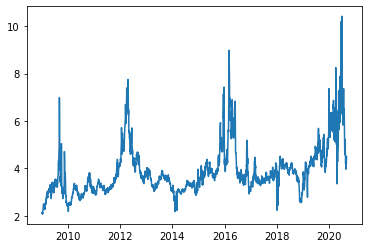

In [31]:
plt.plot(df['DATE'],df['WTI_HH'])

In [ ]:
## markov regime switching for Henry Hub and Newcastle Gas Futures##

mod = sm.tsa.MarkovRegression(df['WTI_ln_r'][1:], k_regimes=2, order=1)
res_mod = mod.fit()
res_mod.summary()

In [ ]:
res.smoothed_marginal_probabilities[3].plot(
    title='Probability of being in the high regime', figsize=(12,2))

In [ ]:
## OLS on volatility output ##

X = df['NCF_ln']
y = df['HH_ln']
X = sm.add_constant(X)
mod1 = sm.OLS(y,X)
results = mod1.fit()
print(results.summary())

In [ ]:
sm.qqplot(results.resid,line="45",fit="TRUE")